# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


#### Setup

In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from IPython.display import display

from matplotlib import rcParams
sns.set(style='ticks', palette='Set2')

import scipy.stats as stats

In [6]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [8]:
pd.set_option('display.max_columns', 9999)

#### Dataset

In [10]:
data.head(1)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.98936,0.0055,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [15]:
data.isnull().values.any()

True

In [16]:
data.columns[data.isnull().any()]

Index(['fracblack', 'fracwhite', 'lmedhhinc', 'fracdropout', 'fraccolp',
       'linc', 'parent_sales', 'parent_emp', 'branch_sales', 'branch_emp',
       'fed', 'fracblack_empzip', 'fracwhite_empzip', 'lmedhhinc_empzip',
       'fracdropout_empzip', 'fraccolp_empzip', 'linc_empzip'],
      dtype='object')

In [20]:
data.call.unique()

array([ 0.,  1.])

In [21]:
data[data.call == 1][['race','call']].groupby(by='race').count()

,call
race,
b,157
w,235


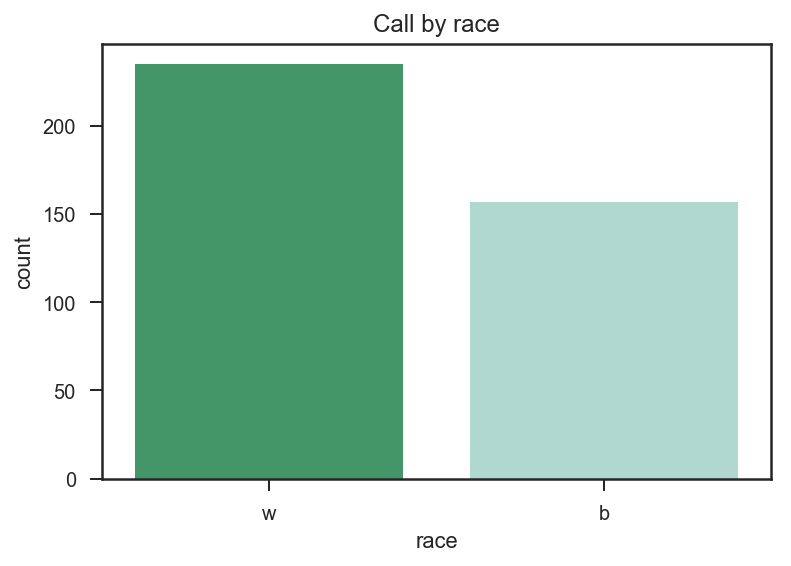

In [24]:
call_df=data[data.call == 1][['race','call']]
sns.countplot(x="race", data=call_df, palette="BuGn_r" ).set_title('Call by race')
plt.show()

#### 2. What are the null and alternate hypotheses?

**Hypothesis:**  
$H_0$ = race has a significant impact on the rate of callbacks with 95% coffidence  
$H_1$ = race doesn't have a significant impact on the rate of callbacks with 95% coffidence

#### 1. What test is appropriate for this problem? Does CLT apply?

In [172]:
bl = call_df['race'][call_df.race=='b'].count()
wh = call_df['race'][call_df.race=='w'].count()
total = call_df['race'].count()
total_black= len(data[data.race=='b'])
total_white= len(data[data.race=='w'])
print('no. of black:', bl)
print('no. of white:', wh)
print('total:', total)
print('total black:', total_black)
print('total white:', total_white)

no. of black: 157
no. of white: 235
total: 392
total black: 2435
total white: 2435


In [147]:
proportain_black = np.mean(black_call, axis=0)
proportain_white = np.mean(white_call, axis=0)
print('Call black: ', proportain_black )
print('Call white: ', proportain_white)

Call black:  0.0644764
Call white:  0.0965092


In [111]:
black = data[data.race == 'b']
white = data[data.race == 'w']
black_call = black.call
white_call = white.call
b_nobs, b_minmax, b_mean, b_variance, b_skewness, b_kurtosis =stats.describe(black_call)
w_nobs, w_minmax, w_mean, w_variance, w_skewness, w_kurtosis =stats.describe(white_call)
print('Proportion of callback for black: {:.2%}'.format(b_mean) )
print('Proportion of callback for white: {:.2%}'.format(w_mean))

Proportion of callback for black: 6.45%
Proportion of callback for white: 9.65%


#### 3. Compute margin of error, confidence interval, and p-value

In [119]:
z_critical = stats.norm.ppf(q = 0.975) 

print('z-critical value: %.2f'%z_critical)                                    

z-critical value: 1.96


In [178]:
# margin of error

import math

white_st = proportain_white*(1-proportain_white)
black_st = proportain_black*(1-proportain_black)
pop_stdev = white_st + black_st

margin_of_error = z_critical * (pop_stdev/math.sqrt(total))
print('Margin of error: %.3f' % margin_of_error)

Margin of error: 0.015


In [179]:
# confidence interval

mean = proportain_white-proportain_black
confidence_interval = (mean - 2*margin_of_error,
                       mean + 2*margin_of_error)  

print('Confidence interval: %.4f %.4f' % confidence_interval)

Confidence interval: 0.0028 0.0612


In [180]:
# z-test

from statsmodels.stats.proportion import proportions_ztest as pz
z_test = pz(np.array([bl,wh]),np.array([total_black,total_white]),value=0)
z_test

(-4.1084121524343464, 3.9838868375850767e-05)

**Conclusion:**  
We reject $H_0$  
The race significantly influenced the call back rate.